In [155]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from indicator import log_returns, stonk_df, plot_window_landscapes
from datetime import date

In [156]:
# Assume analysis is being done on current day after close with knowledge of the prices that day
def rolling_log_return_column(lr_df, n):
    # sum of daily log_returns over N days is the log_return over the next N days
    return lr_df.rolling(n).sum().shift(-(n-1))
def hilo_in_the_next_n_days(lr_df, n, suffix=True):
    df = pd.DataFrame(index=lr_df.index)
    for x in [x+1 for x in range(n)]:
        df['lr_'+str(x)] = rolling_log_return_column(lr_df, x)
    rdf = pd.DataFrame(index=lr_df.index)
    if suffix:
        rdf['lo_'+str(n)] = df.min(axis=1)
        rdf['hi_'+str(n)] = df.max(axis=1)
    else:
        rdf['lo'] = df.min(axis=1)
        rdf['hi'] = df.max(axis=1)
    return rdf

def high_point_in_the_next_n_days(lr_df, n):
    df = pd.DataFrame(index=lr_df.index)
    for n in [x+1 for x in range(14)]:
        df['lr_'+str(n)] = rolling_log_return_column(lr_df, n)
    return df.min(axis=1)

In [167]:
df = pd.read_csv('training_df.zip')
df = df.set_index('Date')
spy_df = stonk_df(
        start_dt="2000-01-01",
        end_dt=str(date.today()),
        ticker_symbol_list=["^GSPC"]
)
lr_df = pd.DataFrame(log_returns(spy_df), index=spy_df.index[1:], columns=["lr_SP"])

In [168]:
target_cols = []
df = df.drop(df.index[0])
for n in [7,14,21,30,60,90]:
    A = hilo_in_the_next_n_days(lr_df,n)
    target_cols += [str(x) for x in A.columns]
    df = pd.concat([df,A.set_index(A.index.strftime("%Y-%m-%d"))],axis=1,sort=False)

In [169]:
target_cols

['lo_7',
 'hi_7',
 'lo_14',
 'hi_14',
 'lo_21',
 'hi_21',
 'lo_30',
 'hi_30',
 'lo_60',
 'hi_60',
 'lo_90',
 'hi_90']

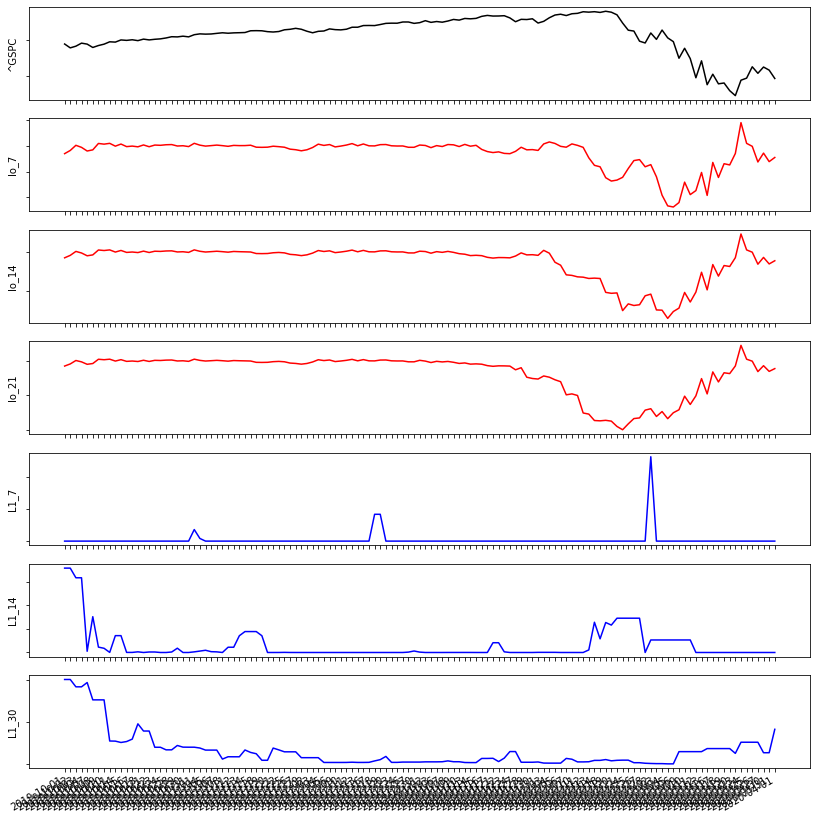

In [179]:
plot_window_landscapes(
        start_dt="2019-10-01",
        end_dt="2020-04-01",
        row_syms=["^GSPC","lo_7","lo_14","lo_21","L1_7","L1_14","L1_30"],
        use_precomputed_df=True,
        colors=['k','r','r','r','b','b','b'],
        precomputed_df=df,
        figscale=(2,1)
    )

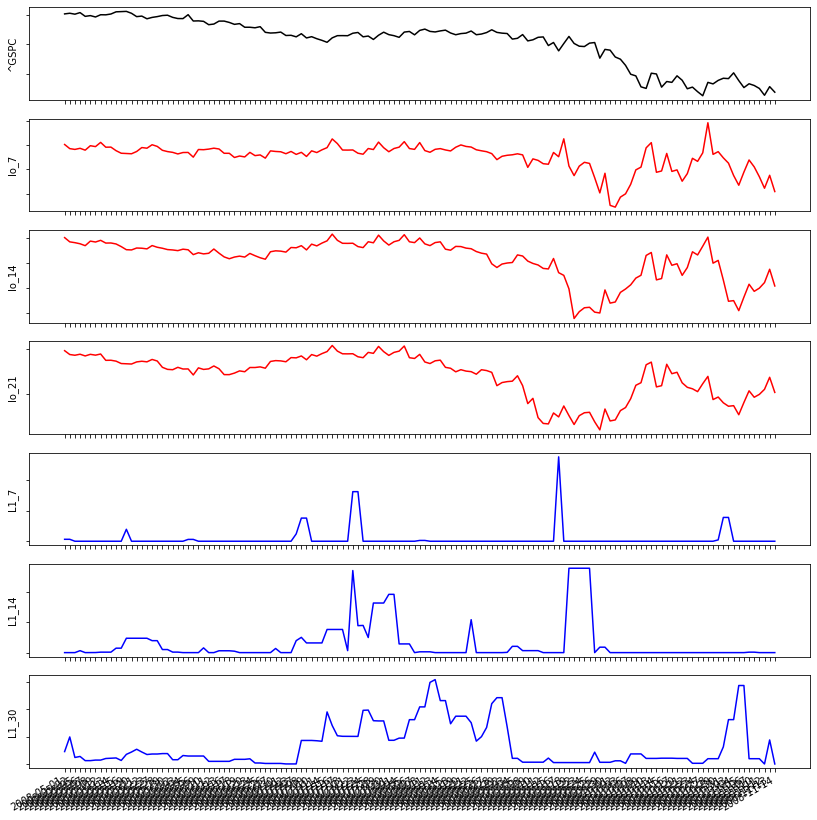

In [178]:
plot_window_landscapes(
        start_dt="2008-05-01",
        end_dt="2008-11-15",
        row_syms=["^GSPC","lo_7","lo_14","lo_21","L1_7","L1_14","L1_30"],
        use_precomputed_df=True,
        colors=['k','r','r','r','b','b','b'],
        precomputed_df=df,
        figscale=(2,1)
    )